In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy as sp
from scipy.spatial import cKDTree
import pickle
import glob
from donutlib.decamutil import decaminfo
from scriptUtil import decodeNumberList
from astropy.io import fits as pyfits

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
#donutana pickle
d = pd.read_pickle("/u/ec/roodman/Astrophysics/Donuts/ComboMeshesZemaxIteration2v22/Science-20140212s2-v22i2_All.pkl")

In [14]:
d

,dodz,dodzerr,dodx,dody,doxt,doyt,dodxerr,dodyerr,doxterr,doyterr,...,z15thetax,z15thetay,z15deltaErr,z15thetaxErr,z15thetayErr,z15meanDeltaBefore,z15rmsDeltaBefore,z15meanDeltaAfter,z15rmsDeltaAfter,ndonuts_used
284601,-2023.657478,0.125846,-812.147330,1511.722174,-5.712738,20.230762,1.575725,1.406952,0.220873,0.224281,...,1.215316e-05,-7.534823e-06,0.000217,0.000002,0.000002,-0.024982,0.016438,0.000341,0.016366,5031
284602,-2017.639831,0.167589,-829.834764,1385.260434,-1.853226,29.219643,1.670313,1.544241,0.240177,0.244752,...,-1.686710e-05,-1.798310e-06,0.000220,0.000002,0.000002,-0.020462,0.016573,0.000180,0.016472,5110
284603,-2017.042149,0.133392,-845.189857,1436.103178,-6.178413,24.481821,1.598182,1.547448,0.223218,0.226633,...,-1.330181e-06,5.648778e-06,0.000220,0.000002,0.000002,-0.032428,0.016110,0.000332,0.016100,4955
284604,-2009.303189,0.131245,-736.267143,1269.445844,-11.101071,24.501750,1.615835,1.446845,0.218847,0.223681,...,2.708970e-05,-1.198795e-05,0.000217,0.000002,0.000002,-0.035200,0.016263,0.000173,0.015962,4773
284605,-2000.937587,0.142632,-786.028498,1410.279058,-6.628407,20.932332,1.709516,1.459435,0.241491,0.246997,...,-8.626925e-06,-2.551629e-06,0.000217,0.000002,0.000002,-0.017916,0.016063,0.000249,0.016037,4761
284606,-2006.725360,0.158064,-810.228482,1329.207798,-5.475429,22.971187,1.759544,1.638153,0.265614,0.273392,...,4.128370e-05,-4.910013e-06,0.000215,0.000002,0.000002,-0.040454,0.016866,0.000109,0.016299,4717
284607,-2025.399280,0.139992,-896.634011,1326.657742,-8.421849,26.562308,1.591203,1.434611,0.235941,0.241254,...,-1.208249e-05,-5.622032e-06,0.000226,0.000002,0.000002,-0.023011,0.016241,0.000307,0.016188,4593
284608,-2003.420828,0.129082,-964.491648,1462.839980,-2.185294,26.025541,1.604377,1.564892,0.224052,0.229528,...,-4.600324e-06,7.058136e-08,0.000216,0.000002,0.000002,-0.028767,0.015730,0.000210,0.015722,4686
284609,-2019.822219,0.111028,-840.675919,1381.380964,-3.401163,22.967966,1.540356,1.455128,0.209860,0.214397,...,1.695081e-05,1.266643e-05,0.000213,0.000002,0.000002,-0.019890,0.015374,0.000140,0.015215,4556
284610,-2026.653087,0.128314,-930.186584,1445.232507,-8.881158,16.750808,1.611602,1.467780,0.215807,0.218381,...,2.596966e-05,-1.274358e-05,0.000217,0.000002,0.000002,-0.027713,0.015624,0.000226,0.015347,4519


<IPython.core.display.Javascript object>


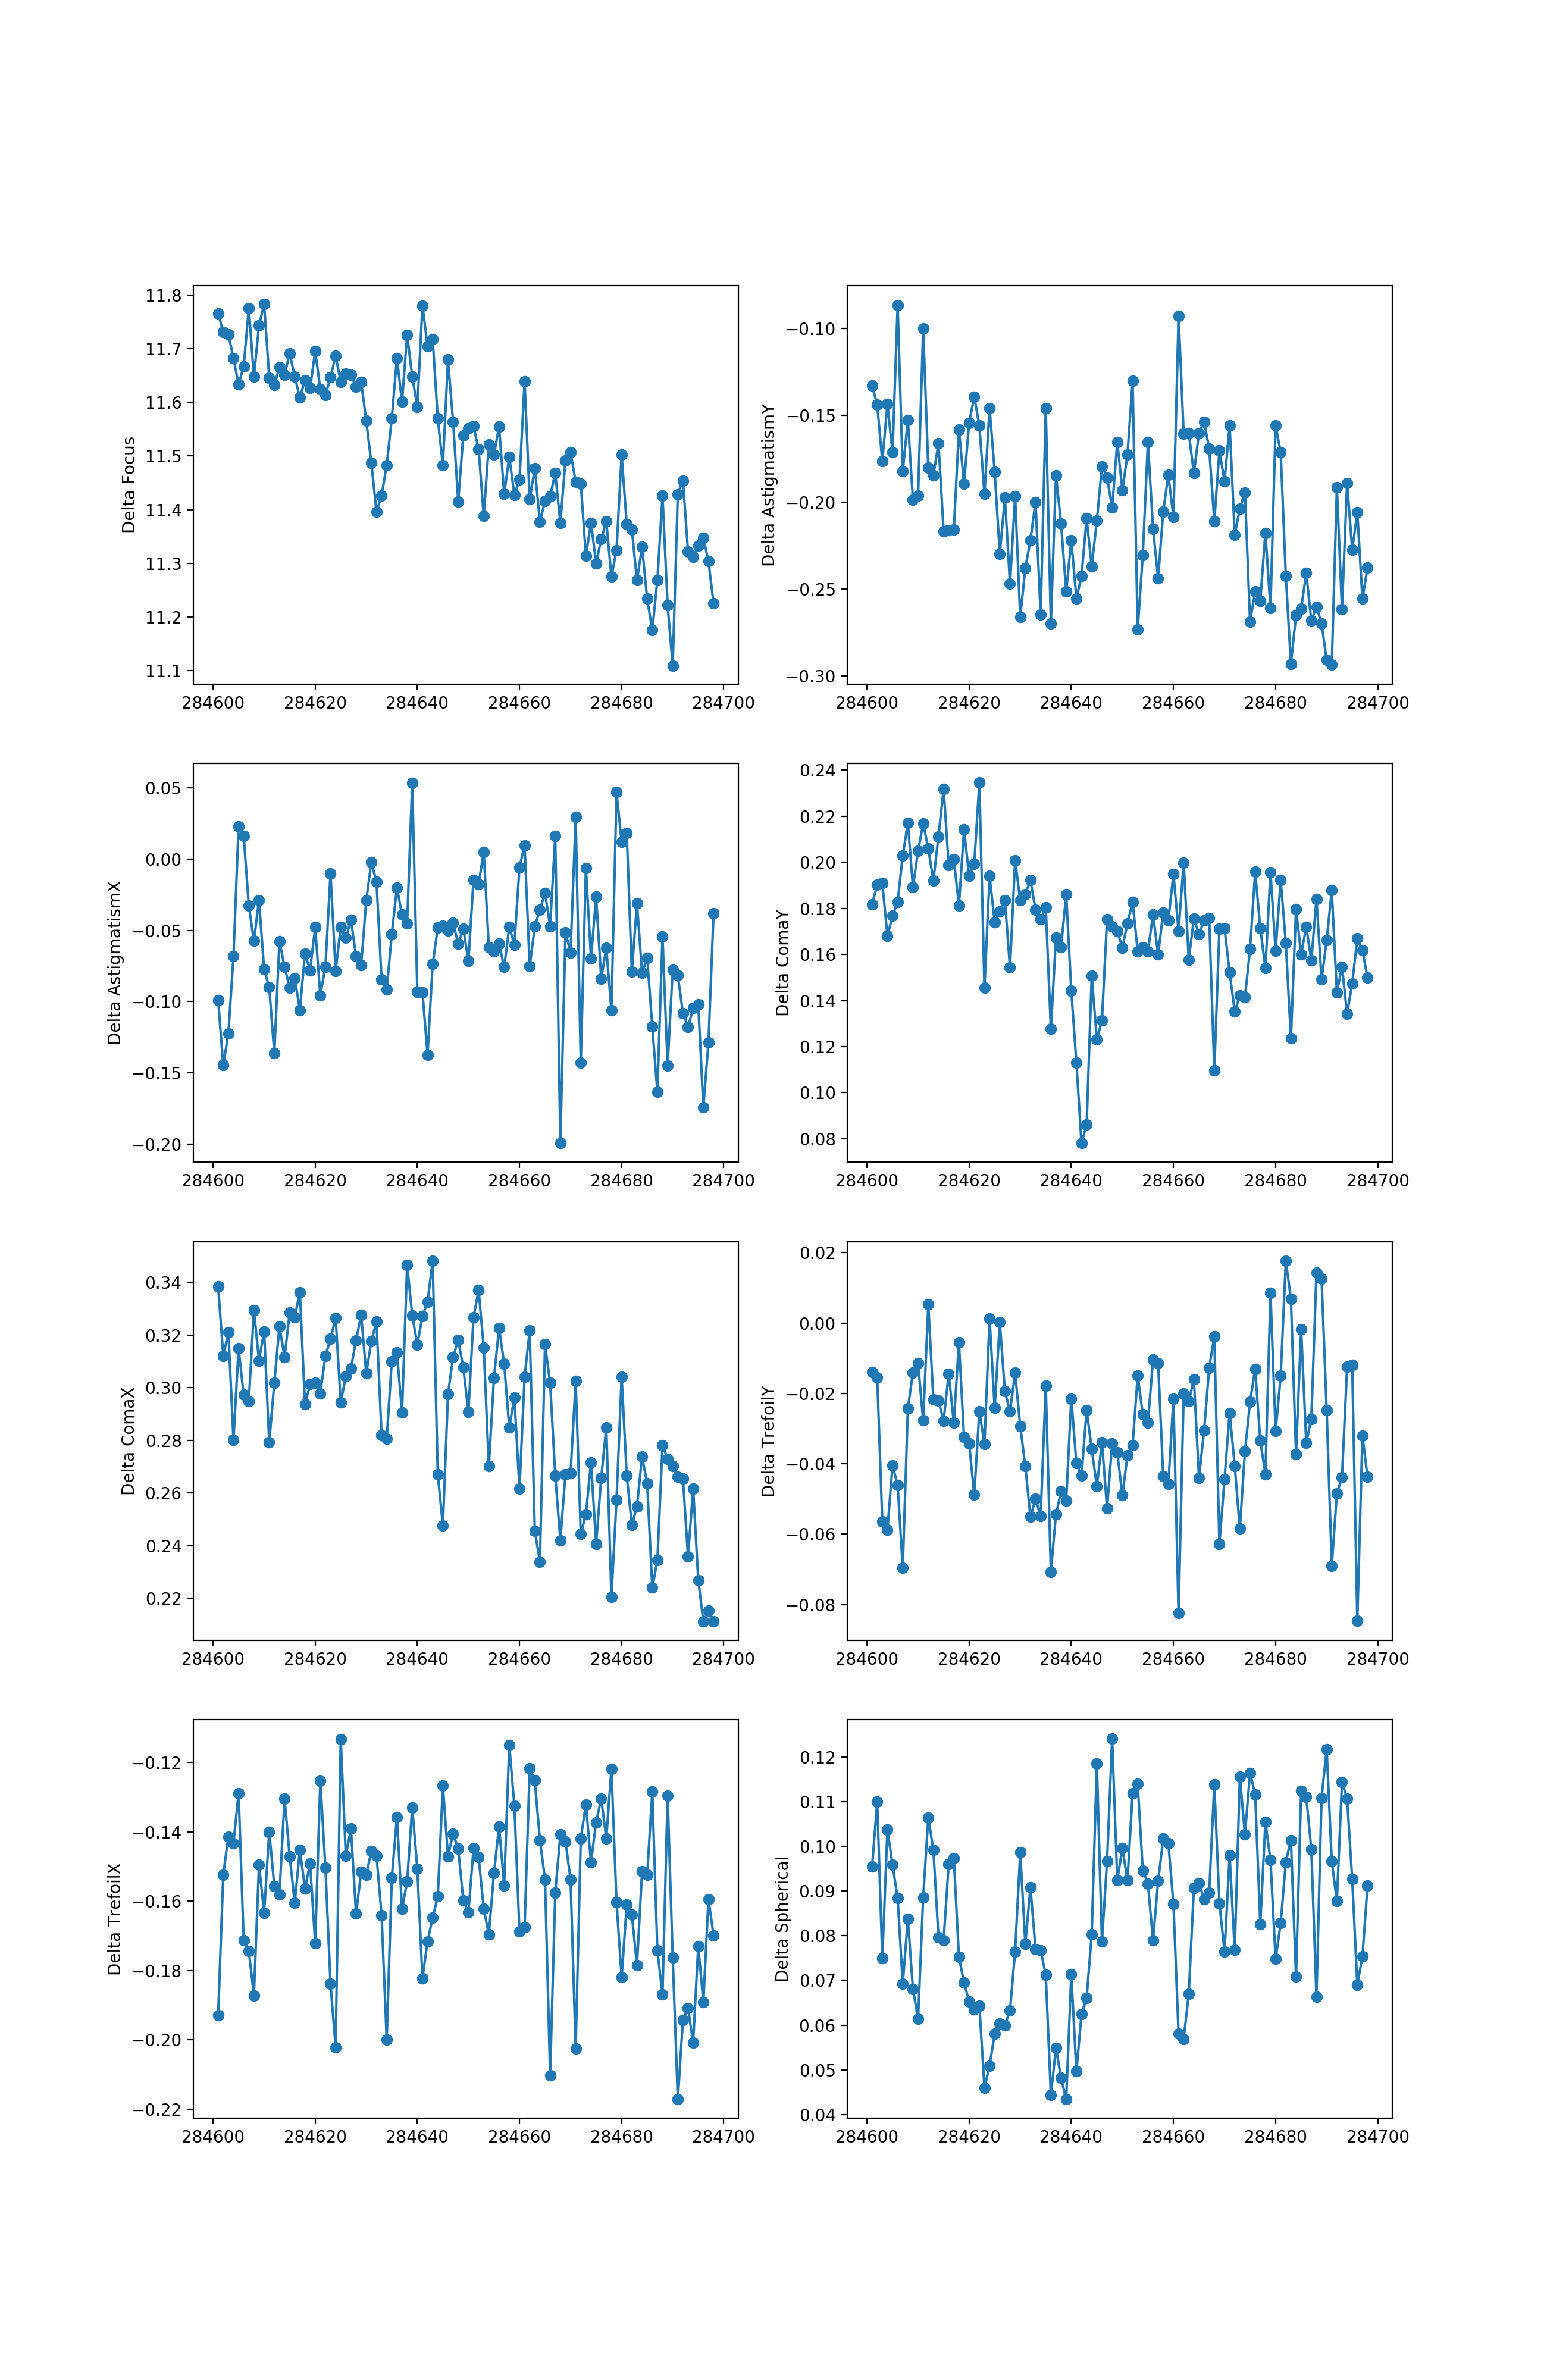

In [23]:
f,axa = plt.subplots(4,2,figsize=(13,20))
names = {4:'Focus',5:'AstigmatismY',6:'AstigmatismX',7:'ComaY',8:'ComaX',9:'TrefoilY',10:'TrefoilX',11:'Spherical'}
factor = {4:172.,5:1.,6:1.,7:1.,8:1.,9:1.,10:1.,11:1.}
ax = axa.flatten()
for iZ in range(4,11+1):
    h = ax[iZ-4].errorbar(d.index.values,d["z%ddelta" % (iZ)]/factor[iZ],xerr=0.,yerr=d["z%ddeltaErr" % (iZ)]/factor[iZ],fmt='-o')   
    ax[iZ-4].set_ylabel("Delta %s" % (names[iZ]))
    


In [24]:
#donutana pickle
d_zband = pd.read_pickle("/u/ec/roodman/Astrophysics/Donuts/ComboMeshesZemaxIteration2v22/Science-20181218s1-v22i2_All.pkl")

<IPython.core.display.Javascript object>


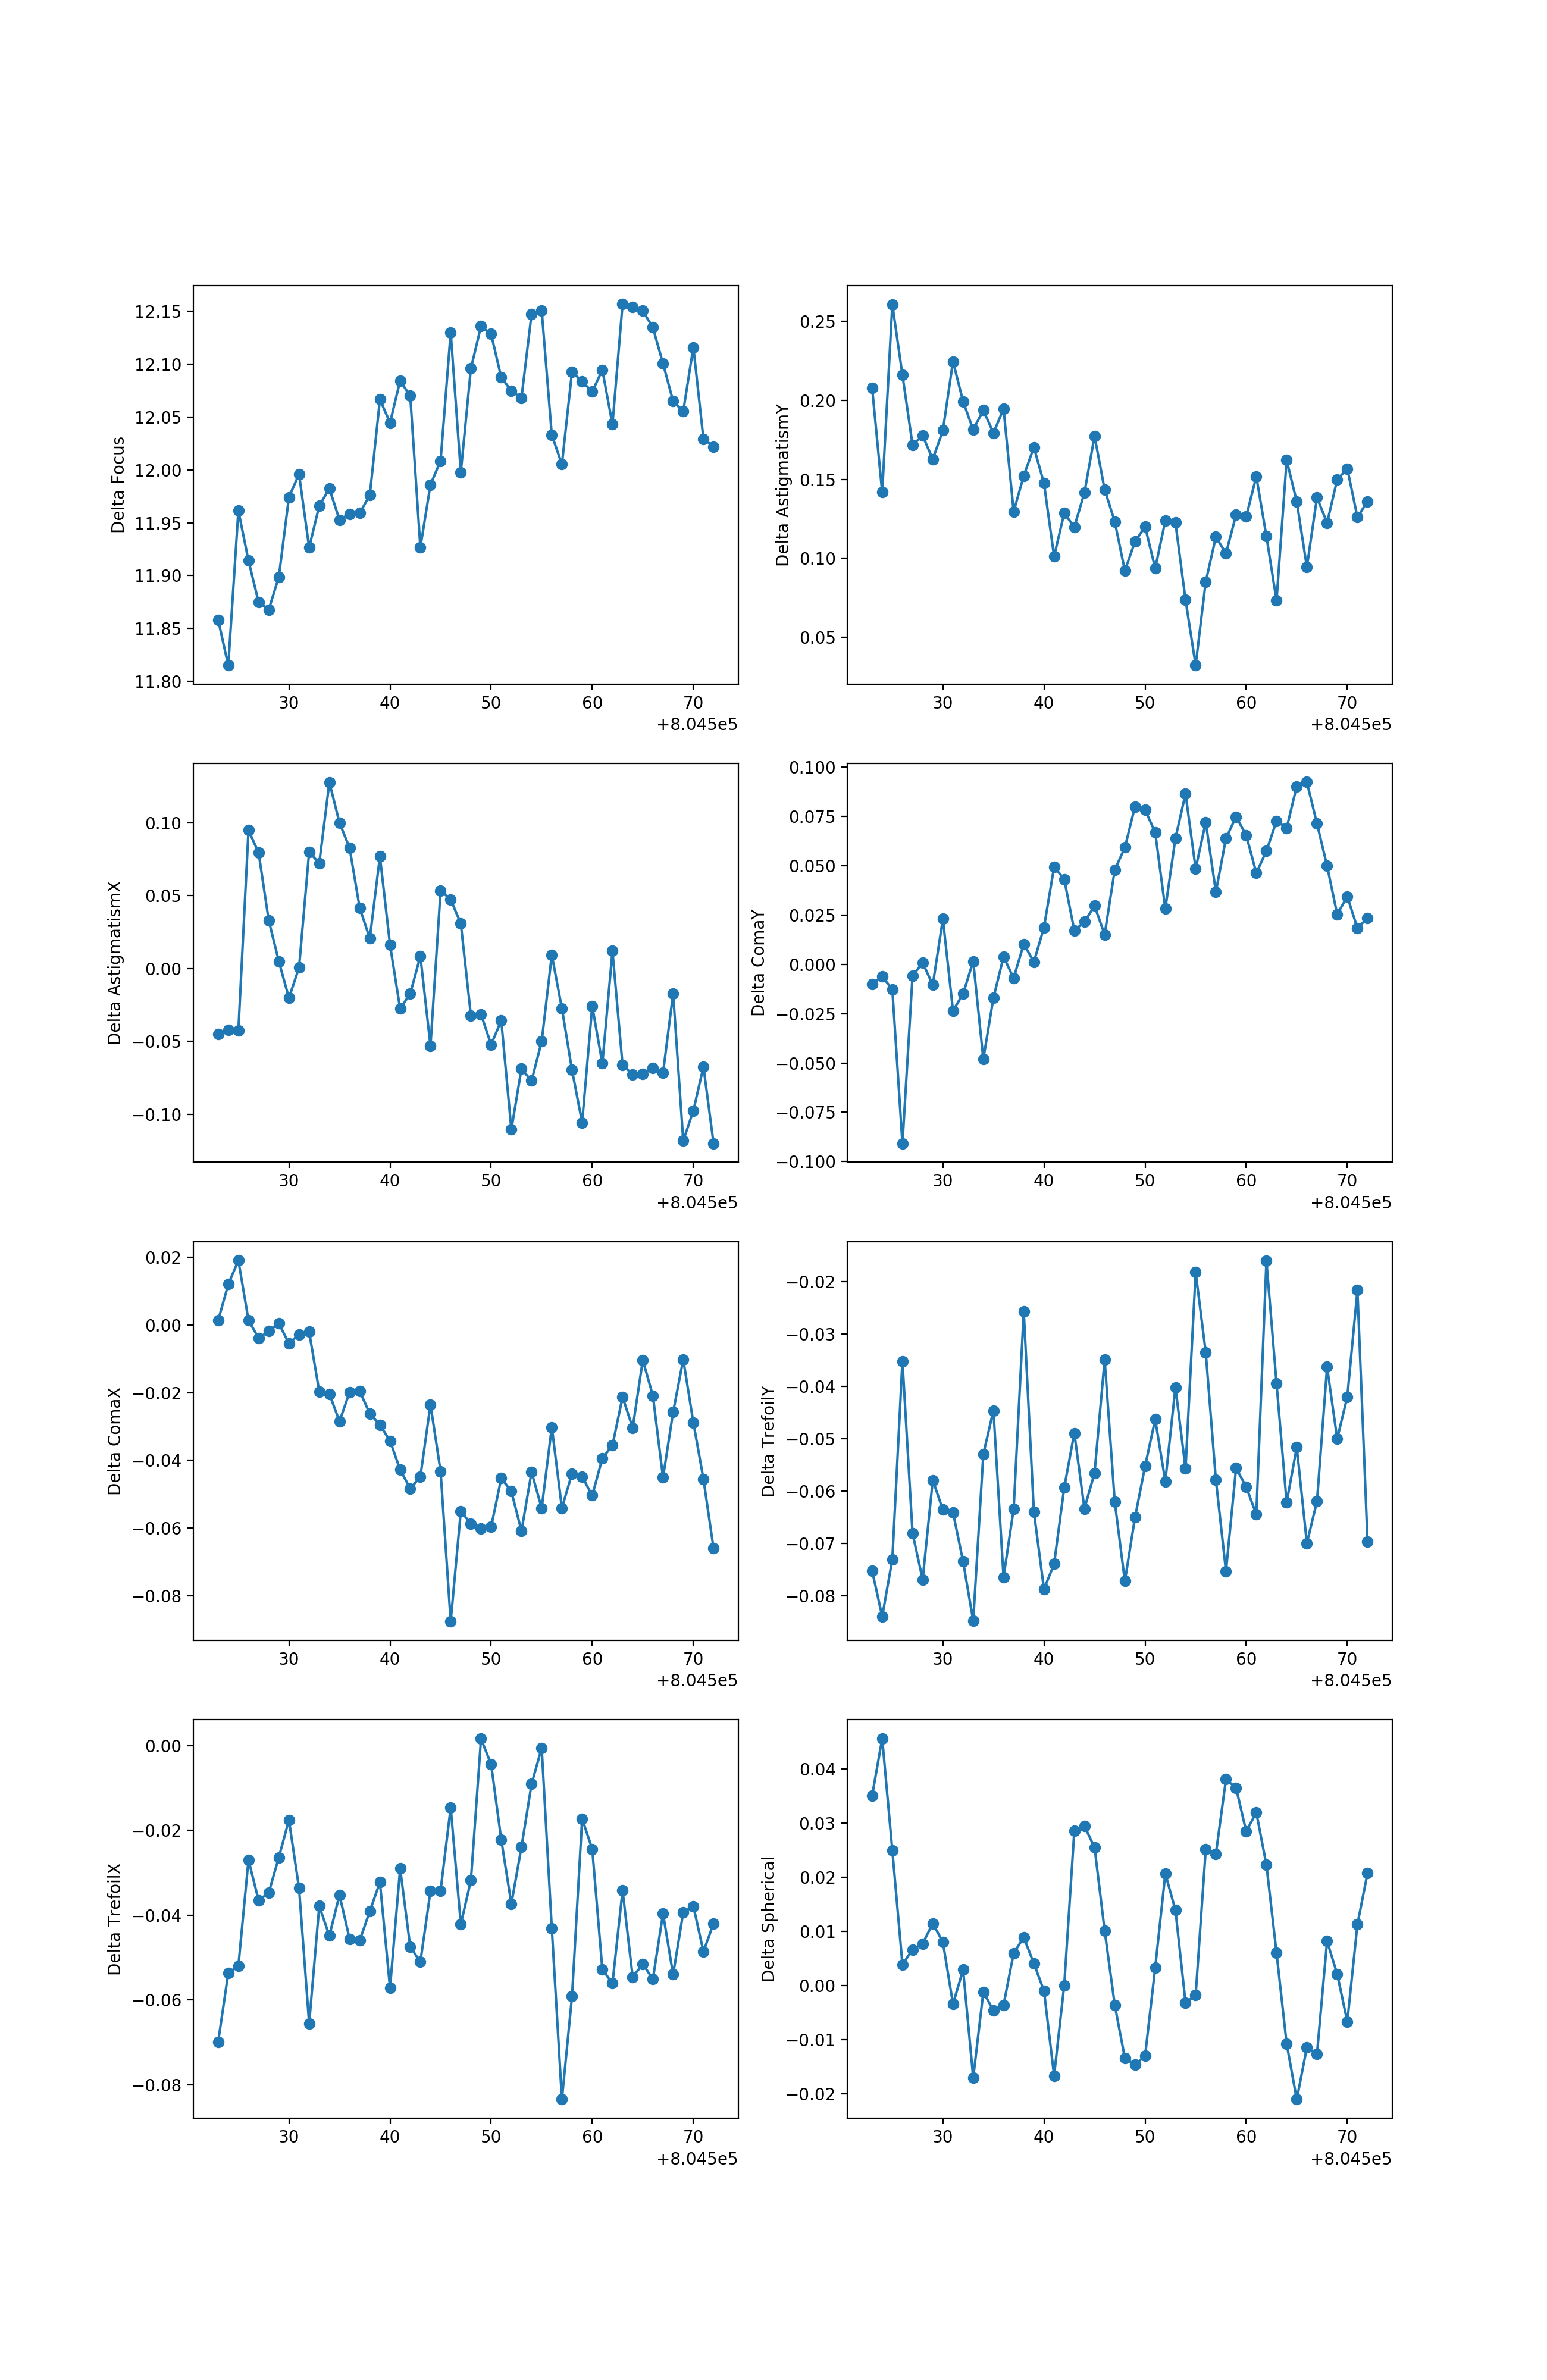

In [26]:
f,axa = plt.subplots(4,2,figsize=(13,20))
names = {4:'Focus',5:'AstigmatismY',6:'AstigmatismX',7:'ComaY',8:'ComaX',9:'TrefoilY',10:'TrefoilX',11:'Spherical'}
factor = {4:172.,5:1.,6:1.,7:1.,8:1.,9:1.,10:1.,11:1.}
ax = axa.flatten()
for iZ in range(4,11+1):
    h = ax[iZ-4].errorbar(d_zband.index.values,d_zband["z%ddelta" % (iZ)]/factor[iZ],xerr=0.,yerr=d_zband["z%ddeltaErr" % (iZ)]/factor[iZ],fmt='-o')   
    ax[iZ-4].set_ylabel("Delta %s" % (names[iZ]))
    